In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
#import data and define test and train datasets
test = pd.read_pickle('test.pkl')
train = pd.read_pickle('train.pkl')

selected_features1 = train.loc[:,"ncfbus_io":"ncfo_io"]
selected_features2 = train.loc[:, "exchange_NASDAQ":"scalerevenue_cat_6"]
selected_features = selected_features1.join(selected_features2)

X_train = selected_features
y_train = train["firm"]

selected_features1 = test.loc[:,"ncfbus_io":"ncfo_io"]
selected_features2 = test.loc[:, "exchange_NASDAQ":"scalerevenue_cat_6"]
selected_features = selected_features1.join(selected_features2)

X_test = selected_features
y_test = test["firm"]

In [3]:
#fit model and print scores
nb = BernoulliNB()
nb.fit(X_train,y_train)
print(np.average(cross_val_score(nb, X_train, y_train, cv=5)))
print(nb.score(X_test,y_test))

0.8016339869281046
0.793733681462141


In [4]:
#print classification report
y_pred_test = nb.predict(X_test)
result1 = classification_report(y_test, y_pred_test)
print("Classification Report:",)
print(result1)

Classification Report:
              precision    recall  f1-score   support

       Big 4       0.86      0.78      0.82       463
       Other       0.71      0.81      0.76       303

    accuracy                           0.79       766
   macro avg       0.79      0.80      0.79       766
weighted avg       0.80      0.79      0.80       766



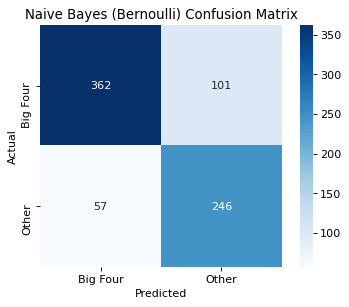

In [5]:
#print confusion matrix
nb_confusion = confusion_matrix(y_test, y_pred_test)
plt.figure(dpi=80)
sns.heatmap(nb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='g',
           xticklabels=['Big Four', 'Other'],
           yticklabels=['Big Four', 'Other'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes (Bernoulli) Confusion Matrix');

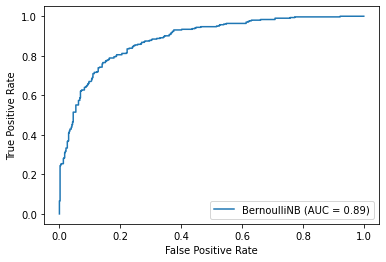

In [6]:
#view ROC curve
metrics.plot_roc_curve(nb, X_test, y_test)
plt.show()

In [8]:
filename = 'nb.pkl'
pickle.dump(nb, open(filename, 'wb'))